In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
Train = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Train"
Validation = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Validation"
Test = "/kaggle/input/medicinal-plant-bijly-withbg/Medicinal Plant-Bijly-withBG/Test"

In [9]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
training_set = tf.keras.utils.image_dataset_from_directory(
    Train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3500 files belonging to 10 classes.


In [10]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
Validation_set = tf.keras.utils.image_dataset_from_directory(
    Validation,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 500 files belonging to 10 classes.


In [11]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [21]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [22]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [23]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [24]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_history = cnn.fit(x=training_set,validation_data=Validation_set,epochs=10)

Epoch 1/10
  2/110 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.0625 - loss: 3.4336    

I0000 00:00:1713772974.024518     210 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713772974.046193     210 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2187 - loss: 2.2360

W0000 00:00:1713773127.007945     211 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713773141.858947     210 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.2199 - loss: 2.2320 - val_accuracy: 0.4720 - val_loss: 1.3932
Epoch 2/10


W0000 00:00:1713773154.111804     208 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


110/110 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.6502 - loss: 0.9470 - val_accuracy: 0.6580 - val_loss: 1.1353
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.7789 - loss: 0.6394 - val_accuracy: 0.5960 - val_loss: 1.4670
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.8544 - loss: 0.4026 - val_accuracy: 0.7540 - val_loss: 0.7129
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.8983 - loss: 0.2910 - val_accuracy: 0.5980 - val_loss: 1.5325
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9339 - loss: 0.1894 - val_accuracy: 0.7520 - val_loss: 0.9885
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.9328 - loss: 0.1979 - val_accuracy: 0.7080 - val_loss: 1.3370
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.9523 - loss: 0.1378 - val_accuracy: 0.7780 - val_loss: 0.9966
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.9628 - loss: 0.1110 - val_accuracy: 0.732

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

110/110 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9922 - loss: 0.0293
Training accuracy: 0.9940000176429749


W0000 00:00:1713774996.750109     211 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(Validation_set)
print('Validation accuracy:', val_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 504ms/step - accuracy: 0.8005 - loss: 0.9117
Validation accuracy: 0.7879999876022339


In [28]:
cnn.save('trained_medical_plant_model.keras')

In [29]:
cnn.save('trained_medical_plant_model.h5')

In [30]:
 #Return Dictionary of history
training_history.history

{'accuracy': [0.3548571467399597,
  0.696571409702301,
  0.8119999766349792,
  0.8757143020629883,
  0.9062857031822205,
  0.9337142705917358,
  0.9511428475379944,
  0.9588571190834045,
  0.9711428284645081,
  0.9628571271896362],
 'loss': [1.7949700355529785,
  0.8310856819152832,
  0.5486283302307129,
  0.35614439845085144,
  0.27546241879463196,
  0.1918928325176239,
  0.1471247375011444,
  0.1211208701133728,
  0.09132302552461624,
  0.11189723759889603],
 'val_accuracy': [0.47200000286102295,
  0.6579999923706055,
  0.5960000157356262,
  0.7540000081062317,
  0.5979999899864197,
  0.7519999742507935,
  0.7080000042915344,
  0.777999997138977,
  0.7319999933242798,
  0.7879999876022339],
 'val_loss': [1.3931858539581299,
  1.1353384256362915,
  1.466955304145813,
  0.7129170894622803,
  1.5324766635894775,
  0.9884688854217529,
  1.3369886875152588,
  0.9965947270393372,
  1.1369683742523193,
  0.8900137543678284]}

In [31]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [32]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


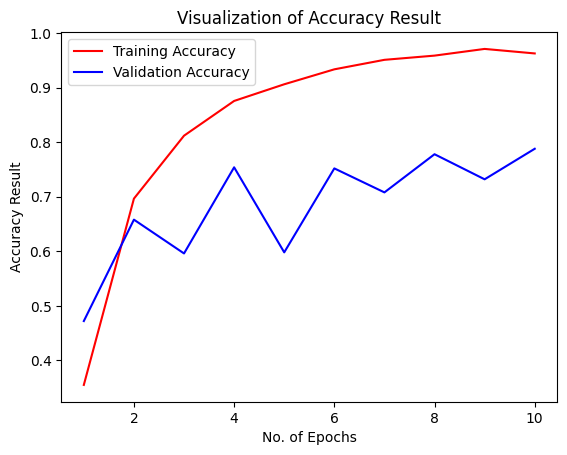

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [34]:
class_name = Validation_set.class_names
class_name

['Bohera',
 'Devilbackbone',
 'Haritoki',
 'Lemongrass',
 'Nayontara',
 'Neem',
 'Pathorkuchi',
 'Thankuni',
 'Tulsi',
 'Zenora']

In [35]:
# Load the training dataset using TensorFlow's image_dataset_from_directory function
test_set = tf.keras.utils.image_dataset_from_directory(
    Test,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1000 files belonging to 10 classes.


In [36]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

 1/32 ━━━━━━━━━━━━━━━━━━━━ 1:15 2s/step

W0000 00:00:1713775262.802731     211 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


32/32 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step


W0000 00:00:1713775306.740645     210 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [37]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [38]:
Y_true

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    

In [39]:
predicted_categories

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 4, 6, 7, 7, 7, 0, 2, 1, 1,
       1, 1, 7, 1, 7, 7, 7, 7, 1, 1, 7, 1, 4, 1, 6, 7, 7, 1, 4, 2, 4, 4,
       4, 4, 1, 4, 1, 4, 4, 7, 7, 7, 4, 7, 1, 1, 1, 1, 1, 1, 4, 1, 4, 6,
       6, 1, 7, 8, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 1, 2, 7, 4, 1,
       1, 1, 1, 7, 6, 6, 7, 1, 8, 4, 1, 4, 4, 1, 4, 1, 1, 4, 1, 4, 1, 1,
       4, 8, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 8, 8, 8,
       8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 4, 4, 8, 4, 8, 4, 8, 8, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 8, 4, 7, 5, 5, 5, 5, 5, 4, 5, 5, 5, 8, 8, 8, 8,
       8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8,
    

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [41]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

       Bohera       0.99      0.92      0.95       100
Devilbackbone       0.67      0.42      0.52       100
     Haritoki       0.45      0.13      0.20       100
   Lemongrass       1.00      0.94      0.97       100
    Nayontara       0.35      0.56      0.43       100
         Neem       0.89      0.96      0.92       100
  Pathorkuchi       0.92      1.00      0.96       100
     Thankuni       0.58      0.79      0.67       100
        Tulsi       0.59      0.75      0.66       100
       Zenora       1.00      0.78      0.88       100

     accuracy                           0.73      1000
    macro avg       0.74      0.73      0.71      1000
 weighted avg       0.74      0.72      0.71      1000



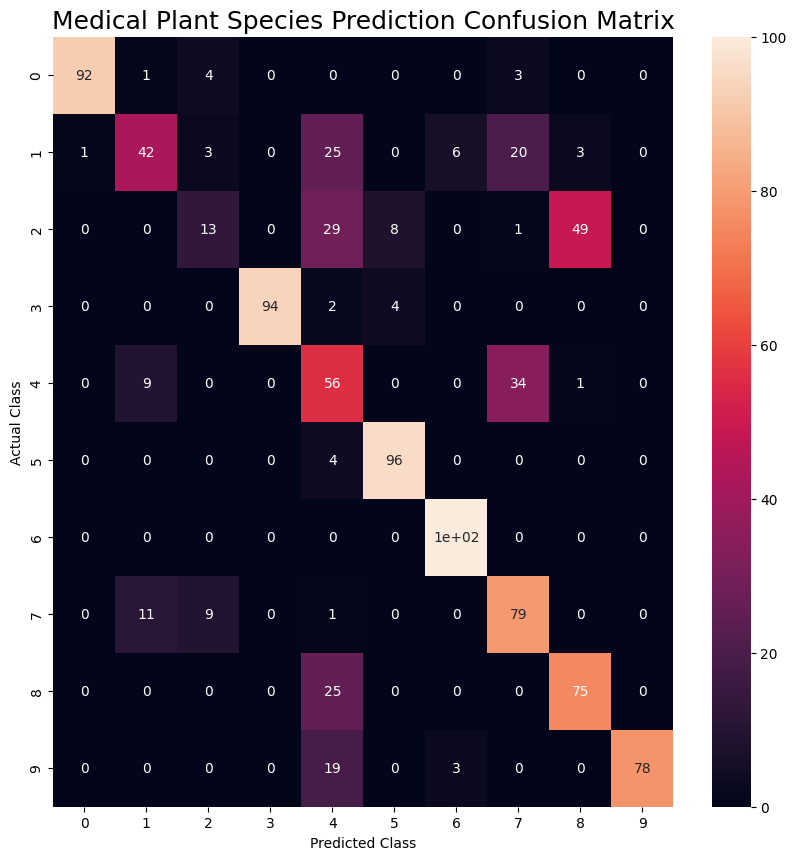

In [42]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Medical Plant Species Prediction Confusion Matrix',fontsize = 18)
plt.show()

In [43]:
cnn.save('last_medical_plant_model.h5')

***GradCAM***

In [1]:
import numpy as np
import os
import cv2

import tensorflow as tf
# from google.colab.patches import cv2_imshow

2024-04-22 07:43:06.871300: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 07:43:06.871449: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 07:43:07.114786: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [60]:
Validation = Validation

In [62]:
image = cv2.imread('Medicinal Plant-Bijly-1-noBG/Validation/Neem/01.png')
if image is None:
    print("Error: Unable to load image")
else:
    print("Image loaded successfully")

print(type(image))

# For TensorFlow models, you might not need to transpose the image dimensions
# image_preprocessed = image_normalized

# Display the preprocessed image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Error: Unable to load image
<class 'NoneType'>


[ WARN:0@210.394] global loadsave.cpp:248 findDecoder imread_('Medicinal Plant-Bijly-1-noBG/Validation/Neem/01.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [3]:
working_dir = '/kaggle/working/'

In [5]:
!ls